# Convolución

$$
y[n] = \sum_{k=-\infty}^{\infty}{f[k]\cdot g[n-k]}
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve


### Creacion de la funcion convolución


In [7]:
def convolucion(f, g):
  """Funcion de convolucion"""

  len_f = len(f)
  len_g = len(g)

  # creacion de vector resultado
  y = np.zeros(len_f + len_g - 1)

  # proceso de convolucion
  for n in range(len(y)):
    for k in range(len_f):
      if n - k >= 0 and n - k < len_g:
        y[n] += f[k] * g[n - k]

  return y

### verificación

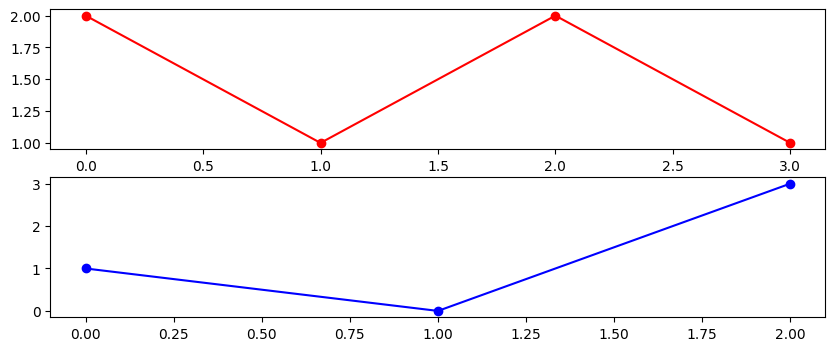

In [5]:
f = [2, 1, 2, 1]
g = [1, 0, 3]

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(f,'o-r')
plt.subplot(2,1,2)
plt.plot(g,'o-b')

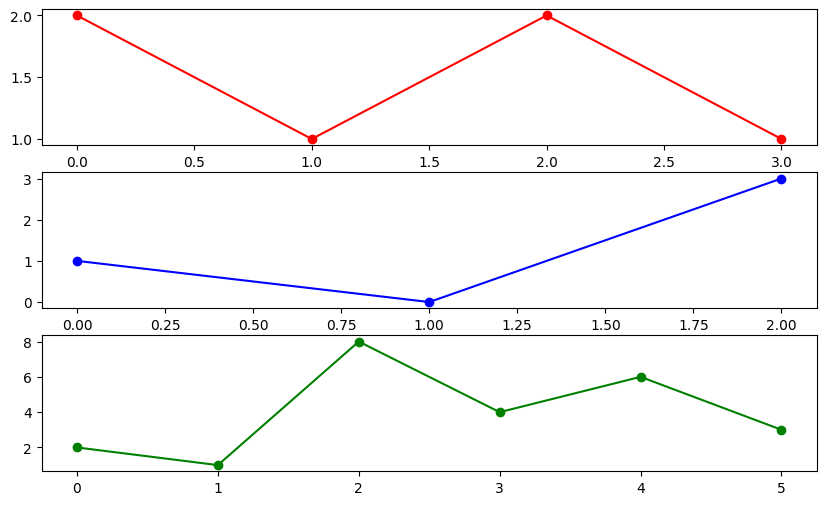

In [8]:
y = convolucion(f,g)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(f,'o-r')
plt.subplot(3,1,2)
plt.plot(g,'o-b')
plt.subplot(3,1,3)
plt.plot(y,'o-g')


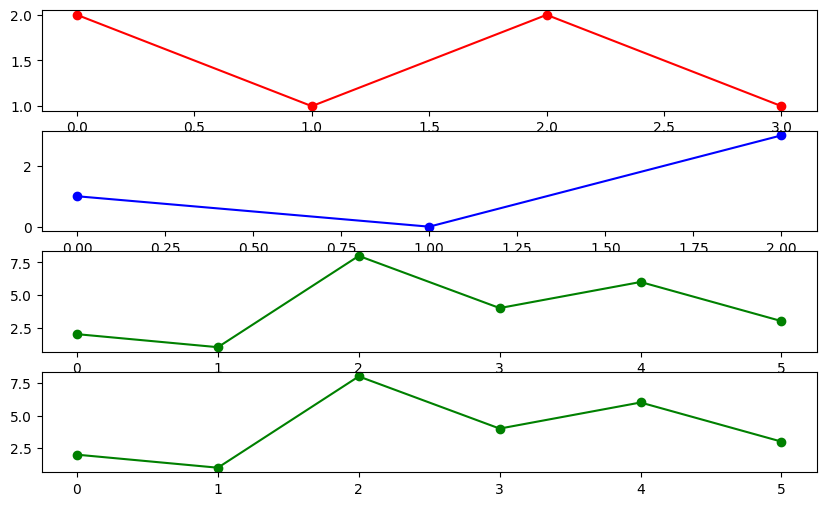

In [12]:
f = [2, 1, 2, 1]
g = [1, 0, 3]

y = convolucion(f,g)
y_ = convolve(f,g)

plt.figure(figsize=(10,6))
plt.subplot(4,1,1)
plt.plot(f,'o-r')
plt.subplot(4,1,2)
plt.plot(g,'o-b')
plt.subplot(4,1,3)
plt.plot(y,'o-g')
plt.subplot(4,1,4)
plt.plot(y_,'o-g')

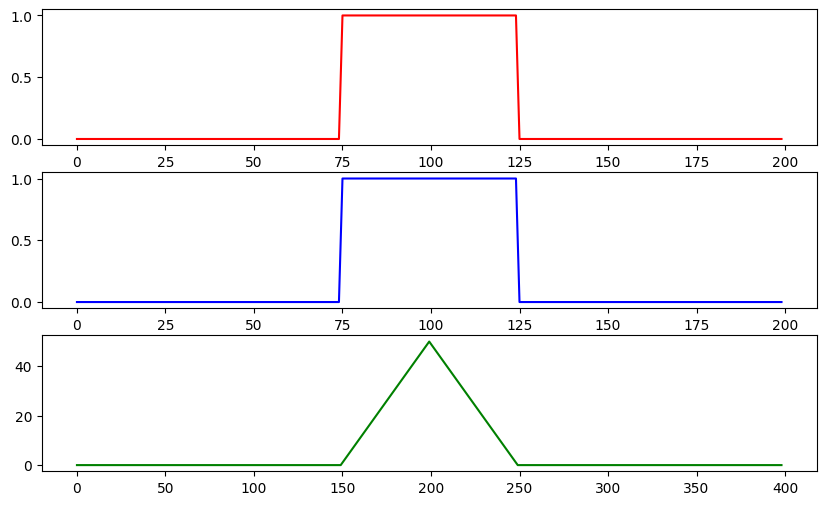

In [20]:
x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[75:125] = np.ones(50)

y = convolve(x, h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x,'-r')
plt.subplot(3,1,2)
plt.plot(h,'-b')
plt.subplot(3,1,3)
plt.plot(y,'-g')

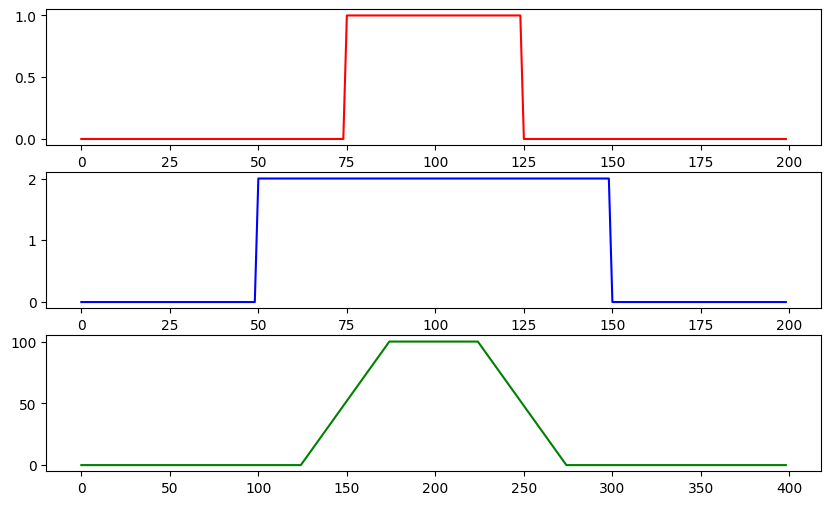

In [23]:
x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[50:150] = 2*np.ones(100)

y = convolve(x, h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x,'-r')
plt.subplot(3,1,2)
plt.plot(h,'-b')
plt.subplot(3,1,3)
plt.plot(y,'-g')

## Propiedad transformada de fourier



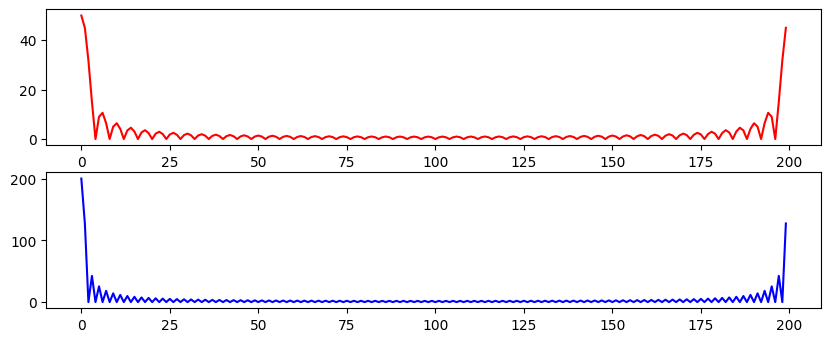

In [24]:
from scipy.fft import fft, ifft

x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[50:150] = 2*np.ones(100)

X_ = fft(x)
H_ = fft(h)



plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(np.abs(X_),'-r')
plt.subplot(3,1,2)
plt.plot(np.abs(H_),'-b')
#plt.subplot(3,1,3)
#plt.plot(y,'-g')

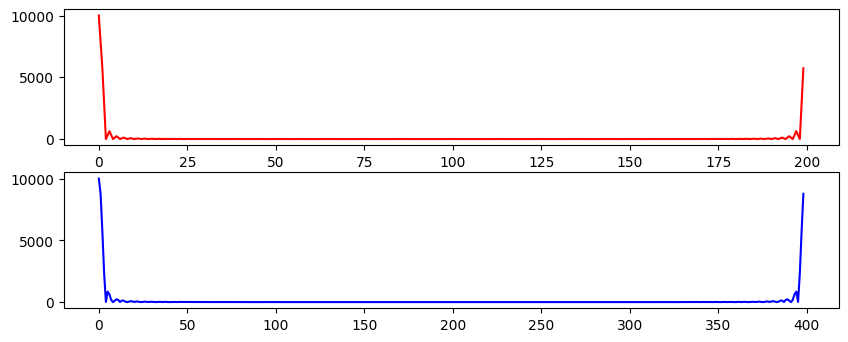

In [25]:
Y_f = X_*H_

y_c = convolve(x,h)
Y_c = fft(y_c)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(np.abs(Y_f),'-r')
plt.subplot(3,1,2)
plt.plot(np.abs(Y_c),'-b')
#plt.subplot(3,1,3)
#plt.plot(y,'-g')

<ipython-input-27-179de87a2de7>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_fr[0:int(N/2)] = y_f[int(N/2):N]
<ipython-input-27-179de87a2de7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  y_fr[int(N/2):N] = y_f[0:int(N/2)]


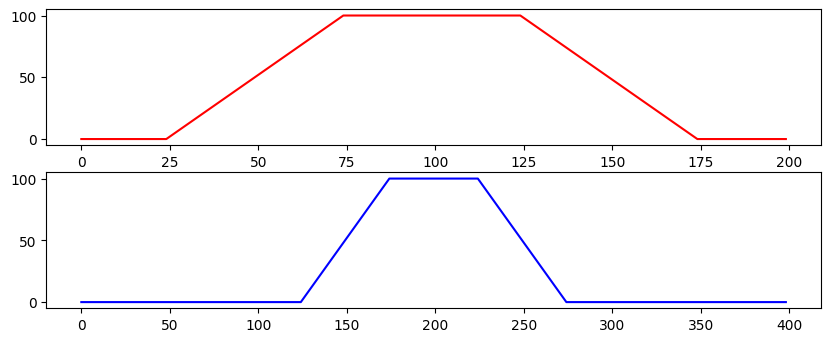

In [27]:
y_f = ifft(Y_f)
N = len(y_f)
y_fr = np.zeros(N)
y_fr[0:int(N/2)] = y_f[int(N/2):N]
y_fr[int(N/2):N] = y_f[0:int(N/2)]

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(y_fr,'-r')
plt.subplot(3,1,2)
plt.plot(y_c,'-b')
#plt.subplot(3,1,3)
#plt.plot(y,'-g')

# Prueba de filtros

(0.0, 2.0)

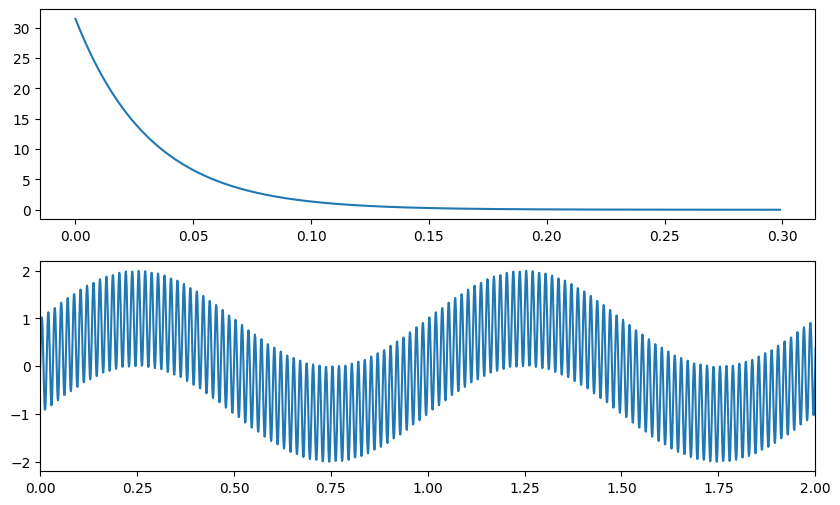

In [48]:
t = np.arange(0,10,0.001)
h = 31.446*np.exp(-31.446*t[0:300]) # respuesta al impulso del filtro RC (1/(RCs+1))
# fc = 5
x = np.sin(2*np.pi*1*t) + np.sin(2*np.pi*60*t)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t[0:300],h)
plt.subplot(2,1,2)
plt.plot(t,x)
plt.xlim(0,2)

(0.0, 2.0)

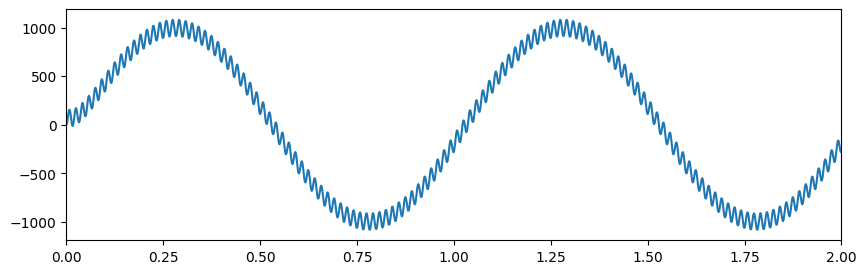

In [49]:
y = convolve(x,h)

plt.figure(figsize=(10,3))
plt.plot(t,y[0:10000])
plt.xlim(0,2)

## Transformada de fourier

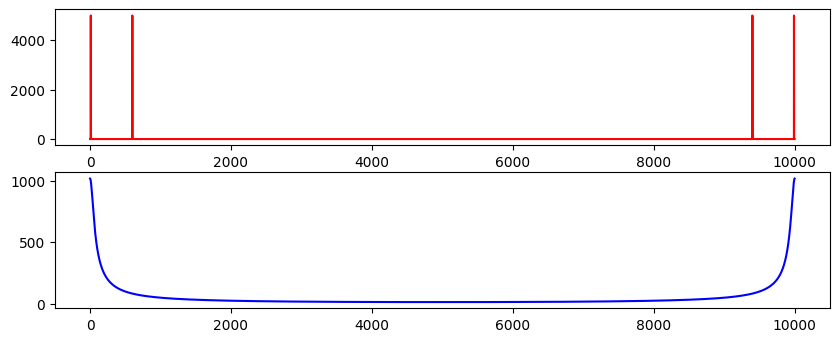

In [50]:
X_ = fft(x, 10000)
H_ = fft(h, 10000)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(np.abs(X_),'-r')
plt.subplot(3,1,2)
plt.plot(np.abs(H_),'-b')
#plt.subplot(3,1,3)
#plt.plot(y,'-g')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


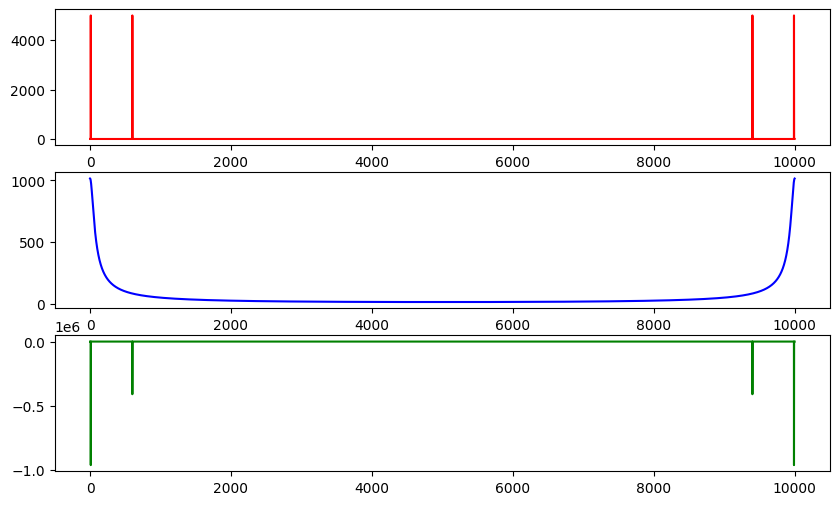

In [51]:
Y_ = X_*H_

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(np.abs(X_),'-r')
plt.subplot(3,1,2)
plt.plot(np.abs(H_),'-b')
plt.subplot(3,1,3)
plt.plot(Y_,'-g')

<ipython-input-54-2157976c33ef>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  y_r[0:int(N/2)] = y_[int(N/2):N]
<ipython-input-54-2157976c33ef>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  y_r[int(N/2):N] = y_[0:int(N/2)]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


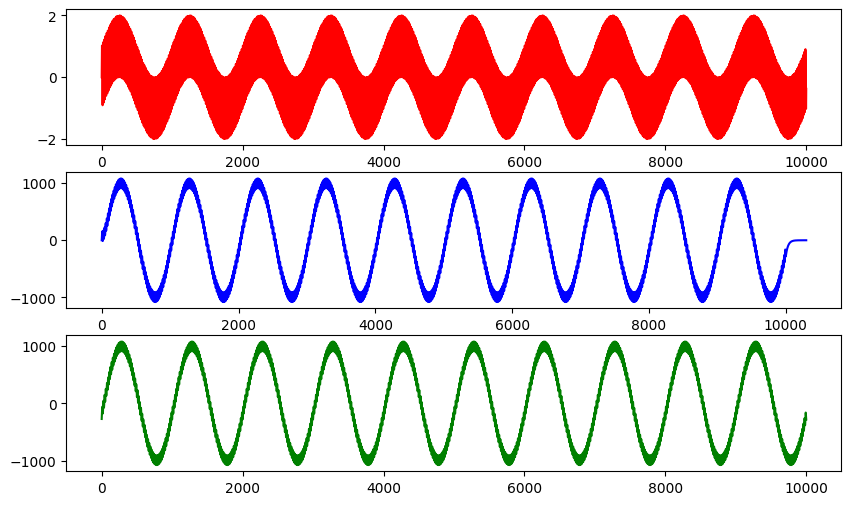

In [54]:
y_ = ifft(Y_)
N = len(y_)
y_r = np.zeros(N)
y_r[0:int(N/2)] = y_[int(N/2):N]
y_r[int(N/2):N] = y_[0:int(N/2)]

y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x,'-r')
plt.subplot(3,1,2)
plt.plot(y,'-b')
plt.subplot(3,1,3)
plt.plot(y_,'-g')